In [37]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [10]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [24]:
train.head(20)

,WKfile,WKrank,WRfile,WRrank,BKfile,BKrank,Class
0,d,3,f,5,a,8,eight
1,d,3,e,2,h,8,nine
2,b,1,g,5,h,5,draw
3,d,3,b,1,g,6,twelve
4,c,2,h,7,f,8,nine
5,d,3,c,8,h,8,eleven
6,c,1,h,7,f,3,fourteen
7,d,3,h,8,b,2,six
8,a,1,d,1,e,3,fifteen
9,c,1,c,4,g,7,fourteen


In [33]:
X_tr = train[['WKfile','WKrank','WRfile','WRrank','BKfile','BKrank']]
y_tr = train['Class']
X_te = test[['WKfile','WKrank','WRfile','WRrank','BKfile','BKrank']]
y_te = test['Class']


In [34]:
#Convert Categorical data to Real Values
vals = {'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8}

X_tr['WKfile'] = list(map(lambda x : vals[x] , X_tr['WKfile']))
X_tr['WRfile'] = list(map(lambda x : vals[x] , X_tr['WRfile']))
X_tr['BKfile'] = list(map(lambda x : vals[x] , X_tr['BKfile']))
X_te['WKfile'] = list(map(lambda x : vals[x] , X_te['WKfile']))
X_te['WRfile'] = list(map(lambda x : vals[x] , X_te['WRfile']))
X_te['BKfile'] = list(map(lambda x : vals[x] , X_te['BKfile']))


/home/sanjeethboddi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/sanjeethboddi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/sanjeethboddi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [9]:
# creating list for alpha
alpha = np.logspace(-4,4,num=9,base =10.0)
alpha

array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
         1.00000000e+02,   1.00000000e+03,   1.00000000e+04])


The optimal number of alpha is 1.000000


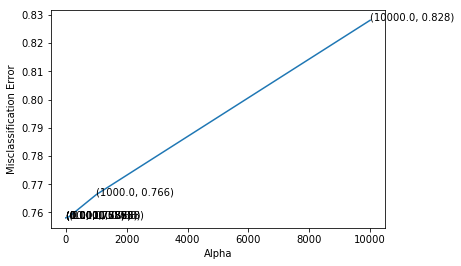

the misclassification error for each alpha value is :  [ 0.758  0.758  0.758  0.758  0.758  0.758  0.758  0.766  0.828]


In [36]:
# empty list that will hold cv scores
cv_scores = []

for a in alpha:
    nb = MultinomialNB(alpha = a)
    scores = cross_val_score(nb, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_alpha = alpha[np.argmin(MSE)]
print('\nThe optimal number of alpha is %f' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(alpha, MSE)

for xy in zip(alpha, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Alpha')
plt.ylabel('Misclassification Error')
plt.show()


print("the misclassification error for each alpha value is : ", np.round(MSE,3))

In [39]:
# instantiate learning model alpha = optimal_alpha
nb = MultinomialNB(alpha =  optimal_alpha)

# fitting the model
nb.fit(X_tr,y_tr)

# predict the response
pred = nb.predict(X_te)

# evaluate accuracy
acc = accuracy_score(y_te, pred) * 100
# evaluate f1 score
f1 =  f1_score(y_te, pred,average='micro')*100
# evaluate precision
precision = precision_score(y_te, pred,average='micro')*100
# evaluate recall
recall = recall_score(y_te, pred,average='micro')*100
# evaluate confusion matrix
confusion = confusion_matrix(y_te, pred)


print('\nThe accuracy of the Naive Bayes classifier for alpha = %f is %f%%' % (optimal_alpha, acc))
print('\nThe precision of the Naive Bayes classifier for alpha = %f is %f%%' % (optimal_alpha, precision))
print('\nThe recall of the Naive Bayes classifier for alpha = %f is %f%%' % (optimal_alpha, recall))
print('\nThe f1-score of the Naive Bayes classifier for alpha = %f is %f%%' % (optimal_alpha, f1))
print('\nThe confusion of the Naive Bayes classifier for alpha = %f is :\n %s' % (optimal_alpha,str(confusion)))


The accuracy of the Naive Bayes classifier for alpha = 1.000000 is 24.616847%

The precision of the Naive Bayes classifier for alpha = 1.000000 is 24.616847%

The recall of the Naive Bayes classifier for alpha = 1.000000 is 24.616847%

The f1-score of the Naive Bayes classifier for alpha = 1.000000 is 24.616847%

The confusion of the Naive Bayes classifier for alpha = 1.000000 is :
 [[ 81  67   8   2   0   0 492   1   0   0   0   0   0  82   0 163   0   0]
 [ 16 250   1   2  15   2  45  23   0   0   0   0   0  31   0  30  12   0]
 [ 38  64  30  12   0   0 214  24   0   0   0   0   6 298   0 142   2   0]
 [ 15   1   0  21   0   0 475   0   0   0   0   0   0 113   0   4   0   0]
 [  8  48   0   0  26   2  10   1   0   0   0   0   5   3   0  14  22   0]
 [  4  10   0   0  16   5   2   0   0   0   0   0   0   0   0   5  11   0]
 [ 46   8   0  40   0   0 923   1   0   0   0   0   0 321   0  31   0   0]
 [ 23 165  21   3   2   0  84  34   0   1   0   0   4  82   0  67   0   0]
 [  4  12   0